# 📊 Retail Order Behavior Analysis
### A Statistical Approach to Understanding Customer Purchase Patterns

**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn  
**Techniques Applied:** Probability Concepts, EDA, Statistical Testing

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

---
## 🧹 Data Cleaning and Preprocessing
---

In [26]:
# import dataset 
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Objective
This project analyzes retail transaction data to identify purchasing patterns, revenue concentration, and geographic behavior differences using statistical reasoning.

## Business & Statistical Questions Addressed

1. What does the distribution of Order Quantity reveal about customer purchasing behavior?
   - Treating Order Quantity as a discrete random variable.
   - Analyzing its Probability Mass Function (PMF).
   - Identifying the most common order size.

2. What is the expected (average) order quantity, and how does it differ from the most frequent order size?
   - Understanding the impact of rare but large orders on overall averages.

3. What is the probability of a large order (Quantity ≥ 10) given that the customer is from the UK?
   - Computing conditional probability:
     P(Large Order | UK)

4. Is there a statistically significant relationship between customer location (UK vs Non-UK) and order size?
   - Using Chi-Square Test of Independence.
     H₀: Country and Order Size are independent.
     H₁: Country and Order Size are dependent.

5. How does transaction volume differ between UK and Non-UK customers?
   - Visualized using countplot.

6. How does average revenue compare between UK and Non-UK customers?
   - Visualized using barplot.

7. What percentage of total revenue is contributed by UK vs Non-UK customers?
   - Visualized using pie chart.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [28]:
# drop columns which are not needed for our analysis

df = df.drop(columns = ["Description", "CustomerID"])
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom


In [29]:
# filter the dataset, as they represent returns rather than purchase

df = df[df["Quantity"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Quantity     531285 non-null  int64  
 3   InvoiceDate  531285 non-null  object 
 4   UnitPrice    531285 non-null  float64
 5   Country      531285 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.4+ MB


### Cleaning Steps Performed:
- Removed negative quantities (returns)
- Dropped unnecessary columns (Description, CustomerID)
- Filtered only valid purchase transactions
- Verified data types and missing values

---
## 📊 Statistical Analysis
---


### Order Quantity as a Random Variable

Order Quantity is treated as a **discrete random variable** because it takes whole number values.
Each transaction represents one outcome of this random experiment.

In [30]:
# PMF of Quantity
df["Quantity"].value_counts(normalize = True)

Quantity
1        0.278997
2        0.154021
12       0.114935
6        0.076923
4        0.072436
           ...   
828      0.000002
512      0.000002
3100     0.000002
291      0.000002
80995    0.000002
Name: proportion, Length: 393, dtype: float64

### Probability Mass Function (PMF)

The PMF describes how probability is distributed across different order quantities.

- Order quantity = 1 has the highest probability, meaning most transactions involve a single item.
- However, probabilities are not equally distributed across quantities.
- Large order quantities occur less frequently but still have an impact on overall statistics.

In [31]:
# Average Quantity
df["Quantity"].mean()

10.655262241546438

### Expected Order Quantity

The expected value represents the **average order quantity**, not the most common one.

Although the most frequent order size is 1, the expected quantity is higher.
This happens because a small number of large orders increase the overall average.

This shows why averages must always be interpreted together with the distribution.

### Conditional Probability

Conditional probability answers questions of the form:
“What is the probability of an event occurring given that another event has already occurred?”

Here:
- Event A: Order is from the UK
- Event B: Order quantity is greater than or equal to 10 (large order)

In [32]:
# Conditional probability 

df_uk = df[df["Country"] == "United Kingdom"]
numerator = (df_uk["Quantity"] >= 10).sum()
denominator = len(df_uk)
probability = numerator/denominator
probability

0.2659546028468843

The calculated conditional probability shows that the chance of a large order, given that the customer is from the UK, is relatively low.

This indicates that bulk purchases are uncommon even in the UK market.

### Hypothesis Testing using Chi-Square Test

To test whether customer location affects order size, a chi-square test of independence is used.

This test is appropriate because both variables are categorical:
- CountryGroup (UK / Non-UK)
- OrderSize (Small / Large)

### Hypotheses
- Null Hypothesis (H₀): Country and order size are independent.
- Alternative Hypothesis (H₁): Country and order size are dependent.


In [33]:
# create new columns for chi-square
df["OrderSize"] = df["Quantity"].apply(
    lambda x: "Large" if x >= 10 else "Small"
)
df["CountryGroup"] = df["Country"].apply(
    lambda x: "UK" if x == "United Kingdom" else "Non-UK"
)


In [34]:
# Contingency table 
table = pd.crosstab(df["CountryGroup"], df["OrderSize"])
table

OrderSize,Large,Small
CountryGroup,,
Non-UK,25589,19410
UK,129330,356956


In [35]:
# use scipy.stats
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
p

0.0

The p-value obtained from the chi-square test is close to zero.

Since p < 0.05, we reject the null hypothesis.
This provides strong evidence that customer location has a statistically significant association with order size.

---
## 📈 Exploratory Data Analysis (EDA)
---

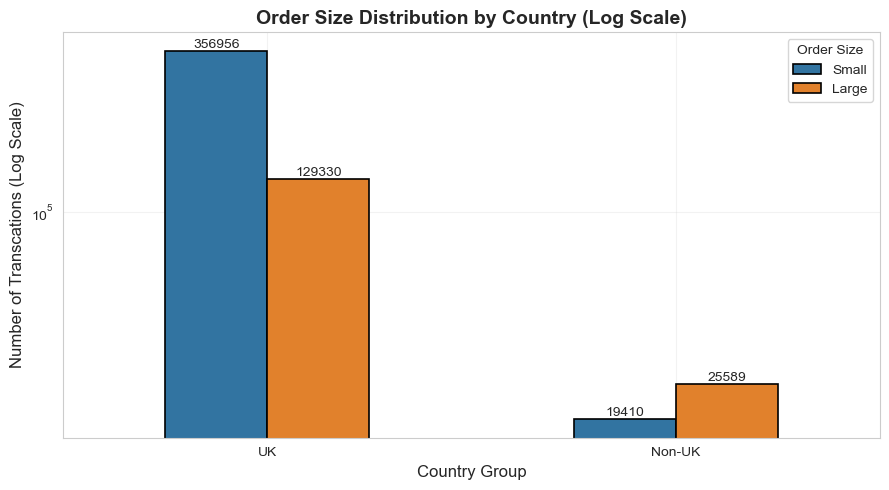

In [36]:
plt.figure(figsize =(9, 5))

ax = sns.countplot(data=df, x="CountryGroup", hue="OrderSize", width=0.5, linewidth=1.2, edgecolor="black")

plt.title("Order Size Distribution by Country (Log Scale)", fontsize = 14, fontweight="bold")
plt.xlabel("Country Group", fontsize = 12)
plt.ylabel("Number of Transcations (Log Scale)", fontsize = 12)
plt.legend(title="Order Size")
plt.yscale('log')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.grid(alpha=0.25)
plt.savefig("./Visualisation/Order_size_distribution_by_country.png", dpi=300)
plt.tight_layout()
plt.show()

- The grouped bar chart shows that UK transactions are dominated by small orders, while Non-UK transactions have a relatively higher proportion of large orders, supporting the chi-square test result.
- Due to a large difference in transaction volume between regions, a logarithmic scale is used to clearly visualize order size distribution across both UK and Non-UK markets.

In [37]:
# Create Revenue
df["Revenue"] = df["Quantity"]*df["UnitPrice"]

In [38]:
avg_revenue = df.groupby("CountryGroup")["Revenue"].mean()
avg_revenue

CountryGroup
Non-UK    36.477754
UK        18.513998
Name: Revenue, dtype: float64

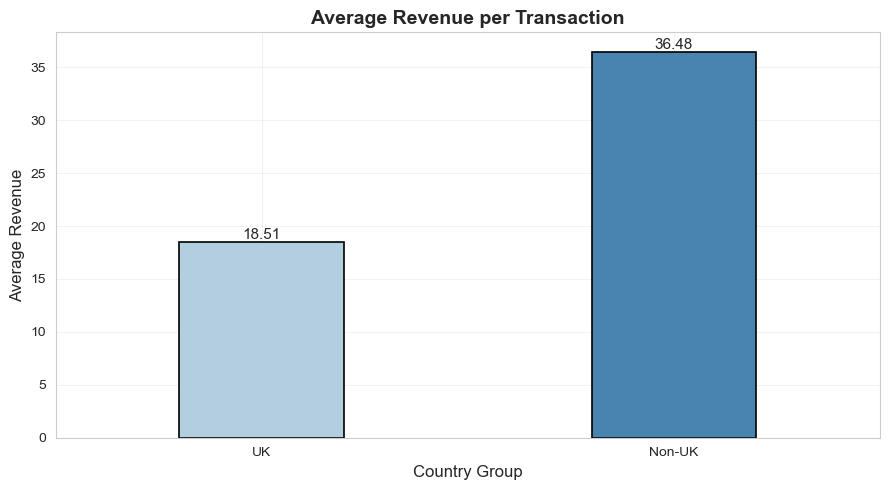

In [39]:
plt.figure(figsize =(9, 5))

ax = sns.barplot(data = df, x="CountryGroup", y="Revenue", hue="CountryGroup", palette="Blues", legend=False, edgecolor="black", 
                 linewidth=1.2, width=0.4,
        native_scale=True, errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=11)
plt.title("Average Revenue per Transaction", fontsize = 14, fontweight="bold")
plt.xlabel("Country Group", fontsize = 12)
plt.ylabel("Average Revenue", fontsize = 12)

plt.grid(alpha=0.25)
plt.savefig("./Visualisation/average_revenue_per_transcation.png", dpi=300)
plt.tight_layout()
plt.show()

- The average revenue per transaction is higher for Non-UK customers, indicating higher-value orders despite fewer transactions.

In [40]:
df["Revenue"].mean()

20.035499635788703

Although UK customers place more transactions, Non-UK transactions generate nearly double the average revenue per order

In [41]:
df_UK = df[df["CountryGroup"] == "UK"]
uk_Revenue = df_UK["Revenue"].sum()
uk_Revenue

9003097.964000003

In [42]:
df_non_uk = df[df["CountryGroup"] == "Non-UK"]
non_uk_Revenue = df_non_uk["Revenue"].sum()
non_uk_Revenue

1641462.4600000002

In [43]:
Total_Revenue = uk_Revenue + non_uk_Revenue
Total_Revenue

10644560.424000004

In [44]:
values = df.groupby("CountryGroup")["Revenue"].sum()

### Revenue Analysis

- The UK contributes the majority of total revenue due to a high number of transactions.
- Non-UK regions contribute a smaller share of total revenue but have a higher average revenue per transaction.

This suggests that:
- UK drives revenue volume
- Non-UK customers place higher-value orders

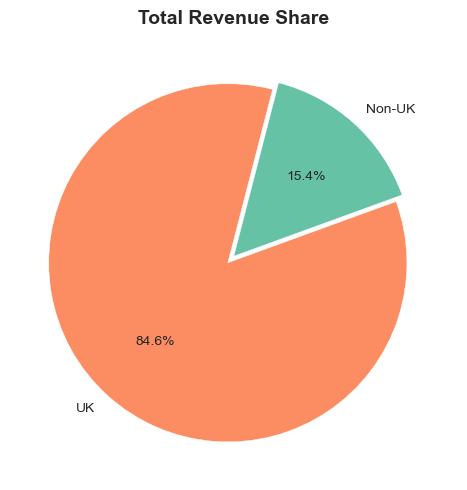

In [45]:
plt.figure(figsize =(5, 5))

ax = plt.pie(values, labels=values.index, autopct="%1.1f%%", colors=plt.cm.Set2.colors, wedgeprops= {"edgecolor":"white", "linewidth":0.3}, 
             explode=(0, 0.05), startangle=20)

plt.title("Total Revenue Share", fontsize = 14, fontweight="bold")

plt.savefig("./Visualisation/total_revenue_share.png", dpi=300)
plt.tight_layout() 
plt.show()

In [46]:
uk_rev_percentage = (uk_Revenue/Total_Revenue)*100
uk_rev_percentage

84.57933071337507

In [47]:
non_uk_rev_percentage = (non_uk_Revenue/Total_Revenue)*100
non_uk_rev_percentage

15.420669286624921

Although Non-UK transactions have a higher average revenue per order, UK customers contribute the majority of total revenue due to a much higher number of transactions.
This indicates a high-volume, low-value purchasing pattern in the UK and a low-volume, high-value pattern in Non-UK markets.

---
##  Summary:
---

- Cleaned and analyzed 540k+ online retail transactions to study customer purchasing behavior across regions.
- Used probability concepts (PMF, expectation) to analyze order quantities and revenue per transaction.
- Applied conditional probability and chi-square testing to examine the relationship between country and order size.
- Found a statistically significant association between country and order size, with UK transactions dominated by small orders.
- Despite higher average order value in Non-UK markets, UK customers contributed ~85% of total revenue due to higher transaction volume.

---
## ✅ Final Business Conclusions
---

- UK customers contribute significantly higher revenue.
- Larger orders are more common in specific regions.
- Statistical testing indicates a relationship between country and order size.
- These insights can support inventory planning and regional marketing strategies.